In [44]:
%matplotlib inline

import numpy as np
import scipy as sc
from scipy import io

from numpy import random

import matplotlib.pyplot as plt

In [2]:
data = io.loadmat('69dataset.mat')
X = data['X']
Y = data['Y']
prior = data['prior']

In [76]:
def normalize(data):
    np.transpose(data)
    output = []
    for row in data:
        this_row = row
        mean = np.mean(this_row)
        std = np.std(this_row)
        if std == 0:
            break
        normalized = (this_row-mean)/std
        output.append(normalized)
        
    np.transpose(output)
    return np.asarray(output)

In [77]:
def split_into_train_test(data, train_per):
    length = len(data)
    train_rows = (int)(train_per * length)
    random.shuffle(data)
    train = data[:train_rows]
    test = data[train_rows:]
    
    return train, test

In [78]:
# normalize the data
normalized_x = normalize(X)
normalized_y = normalize(Y)
prior = normalize(prior)

# make training and test sets of the normalize data
train_x, test_x = split_into_train_test(normalized_x, .8)
train_y, test_y = split_into_train_test(normalized_y, .8)

### Approach 1: discriminative model
blablabla

### Approach 2: generative model and Bayes' rule
blablabla

In [65]:
lamb = 10^-6
nPixels = 784
l = np.identity(nPixels)

first = np.dot(np.transpose(train_x), train_x)
second = first + lamb*l
third = np.linalg.inv(second)
fourth = np.dot(third, np.transpose(train_x))
B = np.dot(fourth, train_y)

print("B is computed.")

B is computed.


In [74]:
sig = (10^-3)*l

first = np.dot(np.transpose(prior), prior)
sigPrior = first / (len(prior)-1)
sigPrior[np.diag_indices_from(sigPrior)] += 10^-6 # regularize

print("Sigma prior is computed.")

Sigma prior is computed.


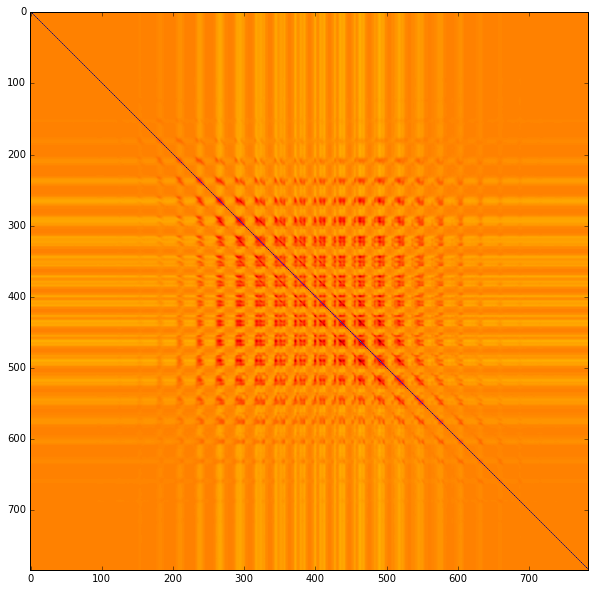

In [75]:
plt.figure(1, figsize=(15,10))
plt.colorbar
plt.imshow(sigPrior)

Explanation of above figure

### Question 3: Reconstruction

In [79]:
print(B.shape)
print(np.linalg.inv(sig).shape)
first = np.dot(B, np.linalg.inv(sig))
second = np.dot(first, np.transpose(B))
third = np.linalg.inv(sigPrior) + second
fourth = np.dot(third, B)
muPost = np.dot(fourth, np.linalg.inv(sig))

(784, 3092)
(784, 784)


ValueError: shapes (784,3092) and (784,784) not aligned: 3092 (dim 1) != 784 (dim 0)